<a href="https://colab.research.google.com/github/ishantmr/learning/blob/main/pytorch_training_pipeline_using_nn_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn

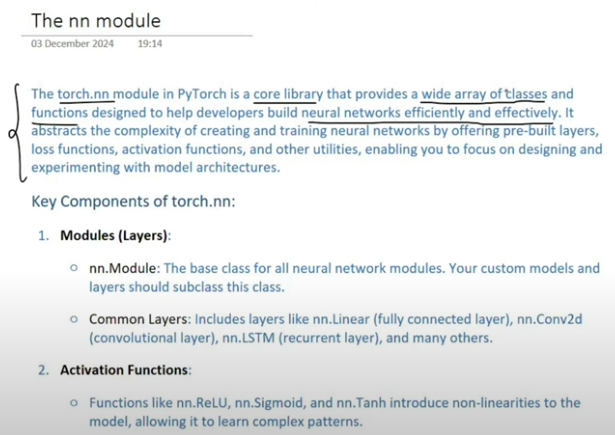

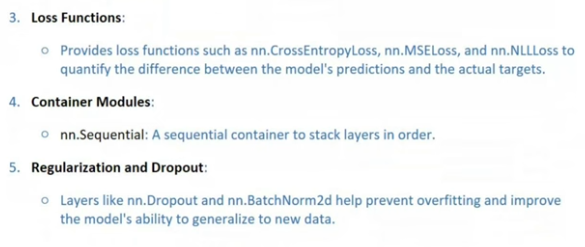

### Defining the model using nn module

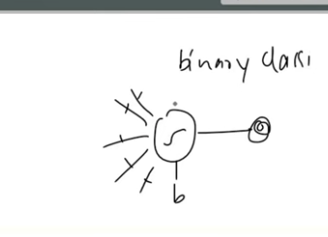

In [9]:
class Model(nn.Module):

  def __init__(self, num_input_features):
    super().__init__() #Parent class ka constructor ko import karenge
    self.linear = nn.Linear(num_input_features, 1) #input and output kitne
    self.sigmoid = nn.Sigmoid() #Activation function bana dia

  def forward(self, features):
    out = self.linear(features) #it will calcuate z =  wx + b
    out = self.sigmoid(out) # yaha se hume y_pred mil jaayega

    return out

In [10]:
# create dataset
features = torch.rand(10, 5) #10 rows, 5 columns - 5 features

#create model
model = Model(features.shape[1]) #this will pass 5

# call model for forward pass
model(features) #no need to do model.forward(features) #ye nn ke magic content hai

tensor([[0.4281],
        [0.4042],
        [0.3922],
        [0.4347],
        [0.4120],
        [0.4466],
        [0.4313],
        [0.4863],
        [0.4239],
        [0.4319]], grad_fn=<SigmoidBackward0>)

In [11]:
#show weights

model.linear.weight

Parameter containing:
tensor([[-0.2712, -0.1538,  0.3959,  0.1877,  0.0872]], requires_grad=True)

In [12]:
#show bias

model.linear.bias

Parameter containing:
tensor([-0.3825], requires_grad=True)

If you want to visualize the full flow then torchinfo

In [13]:
!pip install torchinfo

In [14]:
from torchinfo import summary

summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Trainable params: 6 (5 weights + 1 Bias)

Now lets create a complex NN with a hidden layer
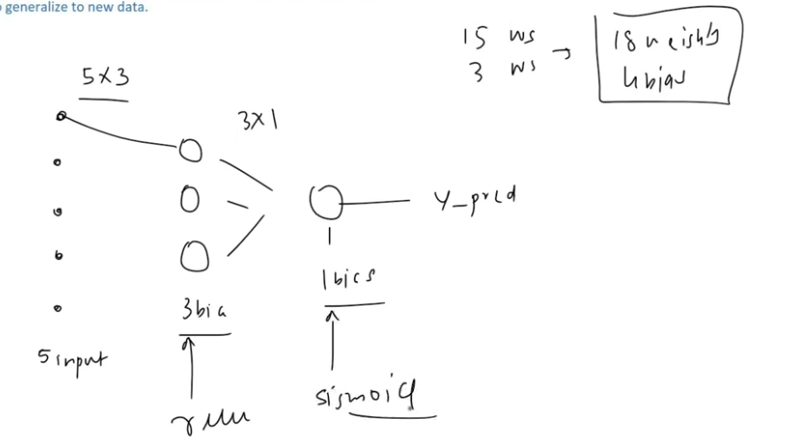

In [15]:
class ComplexModel(nn.Module):

  def __init__(self, num_input_features):
    super().__init__() #Parent class ka constructor ko import karenge
    self.linear_input_layer = nn.Linear(num_input_features, 3) #input and output kitne 5 and 3
    self.relu = nn.ReLU() #Activation function bana dia
    self.linear_hidden_layer = nn.Linear(3, 1) #input and output kitne 3 and 1
    self.sigmoid = nn.Sigmoid() #Activation function bana dia

  def forward(self, features):
    out = self.linear_input_layer(features) #it will calcuate z =  wx + b
    out = self.relu(out)
    out = self.linear_hidden_layer(out)
    out = self.sigmoid(out) # yaha se hume y_pred mil jaayega

    return out

In [16]:
# create dataset
features = torch.rand(10, 5) #10 rows, 5 columns - 5 features

#create model
model = ComplexModel(features.shape[1]) #this will pass 5

# call model for forward pass
model(features) #no need to do model.forward(features) #ye nn ke magic content hai

tensor([[0.5467],
        [0.5625],
        [0.5565],
        [0.5661],
        [0.5683],
        [0.5493],
        [0.5589],
        [0.5685],
        [0.5543],
        [0.5487]], grad_fn=<SigmoidBackward0>)

In [17]:
#show weights

model.linear_input_layer.weight

Parameter containing:
tensor([[-0.2240,  0.2531, -0.0832, -0.3828, -0.2988],
        [-0.1532,  0.0660,  0.1134,  0.3186,  0.0575],
        [ 0.1453,  0.3796,  0.1483,  0.3310,  0.1543]], requires_grad=True)

In [18]:
#show bias

model.linear_input_layer.bias

Parameter containing:
tensor([ 0.1915, -0.1573,  0.0003], requires_grad=True)

In [19]:
#show weights

model.linear_hidden_layer.weight

Parameter containing:
tensor([[-0.2923,  0.2288, -0.2762]], requires_grad=True)

In [20]:
#show bias

model.linear_hidden_layer.bias

Parameter containing:
tensor([0.3979], requires_grad=True)

In [21]:
summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
ComplexModel                             [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Now we can simply this by adding sequential container

In [22]:
class ComplexModel(nn.Module):

  def __init__(self, num_input_features):
    super().__init__() #Parent class ka constructor ko import karenge


    self.network = nn.Sequential(
        nn.Linear(num_input_features, 3), #input and output kitne 5 and 3
        nn.ReLU(), #Activation function bana dia
        nn.Linear(3, 1), #input and output kitne 3 and 1
        nn.Sigmoid() #Activation function bana dia
    )

  def forward(self, features):
    out = self.network(features) #it will run all in sequential order

    return out

Code from previous lecture

In [23]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.shape

(569, 33)

In [26]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [27]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-0.67861375, -1.05732115, -0.646687  , ..., -0.14057245,
        -0.47077555,  0.79215868],
       [-0.0797705 , -0.94305066, -0.12292156, ..., -0.22692605,
         0.08259396, -0.82155124],
       [ 0.98452438,  0.95757088,  1.11668419, ...,  1.29103924,
        -0.9484706 ,  2.07627365],
       ...,
       [ 0.33743309, -0.45565201,  0.46404271, ...,  1.64589618,
         0.56028902,  1.89679125],
       [ 0.62975942,  0.94824267,  0.70361996, ...,  1.67483301,
         3.0291684 ,  0.64802888],
       [-0.49129785, -0.36003792, -0.43354586, ..., -0.62640663,
        -0.54645002,  0.50933793]])

In [31]:
y_train

,diagnosis
510,B
279,B
468,M
499,M
567,M
...,...
248,B
175,B
257,M
370,M


### Label Encoding

In [32]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [33]:
y_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

### Numpy arrays to PyTorch tensors

In [34]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [35]:
X_train_tensor.shape

torch.Size([455, 30])

In [36]:
X_train_tensor

tensor([[-0.6786, -1.0573, -0.6467,  ..., -0.1406, -0.4708,  0.7922],
        [-0.0798, -0.9431, -0.1229,  ..., -0.2269,  0.0826, -0.8216],
        [ 0.9845,  0.9576,  1.1167,  ...,  1.2910, -0.9485,  2.0763],
        ...,
        [ 0.3374, -0.4557,  0.4640,  ...,  1.6459,  0.5603,  1.8968],
        [ 0.6298,  0.9482,  0.7036,  ...,  1.6748,  3.0292,  0.6480],
        [-0.4913, -0.3600, -0.4335,  ..., -0.6264, -0.5465,  0.5093]],
       dtype=torch.float64)

In [37]:
y_train_tensor.shape

torch.Size([455])

In [38]:
import torch.nn as nn

class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear(features)
    out = self.sigmoid(out)
    return out

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss


In [39]:
learning_rate = 0.1
epochs = 25

### Training Pipeline

In [40]:
# create model
model1 = MySimpleNN(X_train_tensor.shape[1])

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model1(X_train_tensor.float()) # Convert input tensor to float

  # loss calculate
  loss = model1.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model1.linear.weight -= learning_rate * model1.linear.weight.grad
    model1.linear.bias -= learning_rate * model1.linear.bias.grad

  # zero gradients
  model1.linear.weight.grad.zero_()
  model1.linear.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.7078534364700317
Epoch: 2, Loss: 0.705036997795105
Epoch: 3, Loss: 0.7025147676467896
Epoch: 4, Loss: 0.7002264261245728
Epoch: 5, Loss: 0.6981309652328491
Epoch: 6, Loss: 0.6961991190910339
Epoch: 7, Loss: 0.694409191608429
Epoch: 8, Loss: 0.6927443742752075
Epoch: 9, Loss: 0.6911908984184265
Epoch: 10, Loss: 0.6897379755973816
Epoch: 11, Loss: 0.6883761882781982
Epoch: 12, Loss: 0.6870976686477661
Epoch: 13, Loss: 0.6858957409858704
Epoch: 14, Loss: 0.6847643852233887
Epoch: 15, Loss: 0.6836986541748047
Epoch: 16, Loss: 0.682693600654602
Epoch: 17, Loss: 0.6817453503608704
Epoch: 18, Loss: 0.6808498501777649
Epoch: 19, Loss: 0.6800037622451782
Epoch: 20, Loss: 0.6792040467262268
Epoch: 21, Loss: 0.6784477233886719
Epoch: 22, Loss: 0.6777321696281433
Epoch: 23, Loss: 0.6770549416542053
Epoch: 24, Loss: 0.6764136552810669
Epoch: 25, Loss: 0.6758062243461609


In [41]:
model1.linear.weight

Parameter containing:
tensor([[ 0.0229,  0.0376, -0.1235, -0.0119,  0.0083,  0.0475, -0.0978,  0.1128,
         -0.0364,  0.0208,  0.1472,  0.0414, -0.1326, -0.1469, -0.0665, -0.0248,
         -0.0198, -0.0578,  0.0644,  0.1428,  0.0277, -0.0091,  0.1534,  0.0908,
          0.0046,  0.0081,  0.0884, -0.1640,  0.0353, -0.0849]],
       requires_grad=True)

In [42]:
# model evaluation
with torch.no_grad():
  y_pred = model1(X_test_tensor.float())
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.6491228342056274


Using Built in loss function and optimizer

In [43]:
import torch.nn as nn

class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear(features)
    out = self.sigmoid(out)
    return out

In [44]:
learning_rate = 0.1
epochs = 25

In [45]:
loss_function = nn.BCELoss() #Binary Cross Entropy Loss built in function in NN Module
type(loss_function)

torch.nn.modules.loss.BCELoss

In [53]:
# create model
model1 = MySimpleNN(X_train_tensor.shape[1])

# optimization
# define optimizer
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model1(X_train_tensor.float()) # Convert input tensor to float

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1).float())

  #clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  #paramter update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.7700532674789429
Epoch: 2, Loss: 0.5645735859870911
Epoch: 3, Loss: 0.46115171909332275
Epoch: 4, Loss: 0.3997039198875427
Epoch: 5, Loss: 0.35823118686676025
Epoch: 6, Loss: 0.3279188573360443
Epoch: 7, Loss: 0.30454573035240173
Epoch: 8, Loss: 0.2858199179172516
Epoch: 9, Loss: 0.2703811526298523
Epoch: 10, Loss: 0.25736644864082336
Epoch: 11, Loss: 0.24619948863983154
Epoch: 12, Loss: 0.2364790141582489
Epoch: 13, Loss: 0.22791625559329987
Epoch: 14, Loss: 0.22029726207256317
Epoch: 15, Loss: 0.21345975995063782
Epoch: 16, Loss: 0.20727823674678802
Epoch: 17, Loss: 0.20165374875068665
Epoch: 18, Loss: 0.19650721549987793
Epoch: 19, Loss: 0.191774383187294
Epoch: 20, Loss: 0.187402606010437
Epoch: 21, Loss: 0.18334822356700897
Epoch: 22, Loss: 0.1795746088027954
Epoch: 23, Loss: 0.17605087161064148
Epoch: 24, Loss: 0.17275068163871765
Epoch: 25, Loss: 0.16965140402317047


In [54]:
# model evaluation
with torch.no_grad():
  y_pred = model1(X_test_tensor.float())
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5392428636550903


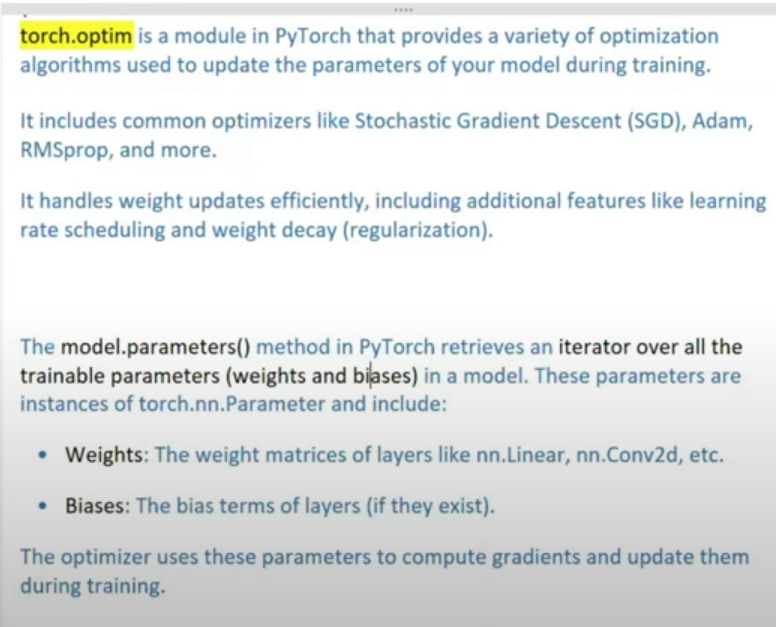